In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import astropy
from astropy.io import fits
from astropy import cosmology
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=100. * u.km / u.s / u.Mpc, Om0=0.31)
from calc_kcor import*
c = 299792.458

In [2]:
fuji_pv = pd.read_csv("fuji_pv_new.csv")
fuji_pv

,#fibermap_targetid,fibermap_i,ra_1,dec_1,targetid_1,id,healpix,survey,program,targetid.1,...,Sn,logdist,logdist_err,logdist_alpha,pv,pverr,logdist_corr,logdist_err_corr,pv_corr,pverr_corr
0,39628417112478213,400,192.260477,26.893112,39628417112478213,1301,28148,sv1,bright,39628417112478213,...,1.000000,0.033927,0.095410,-0.097184,594.976580,1673.185069,0.024632,0.095425,431.970315,1673.450645
1,39628417133447721,426,193.579225,27.068031,39628417133447721,1304,28149,sv1,bright,39628417133447721,...,1.000000,0.187536,0.095063,0.167988,3694.813008,1872.927512,0.178241,0.095078,3511.681867,1873.226965
2,39627769709071900,191,184.913600,-0.750861,39627769709071900,1516,26254,sv1,bright,39627769709071900,...,1.000000,-0.109745,0.095280,-0.337974,-2337.559597,2029.441278,-0.119040,0.095295,-2535.543937,2029.764284
3,39633076111803113,63,119.188267,39.927879,39633076111803113,996,6541,sv1,bright,39633076111803113,...,1.000000,0.000921,0.099558,0.342711,8.263345,893.485385,-0.008374,0.099572,-75.155860,893.615633
4,39628422523128777,203,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,...,1.000000,-0.056939,0.095488,-0.182259,-961.881804,1613.103899,-0.066234,0.095503,-1118.906234,1613.359520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,39633236212580575,207,173.537567,49.254544,39633236212580575,2614,5618,sv2,bright,39633236212580575,...,0.778542,0.025256,0.100769,-0.310789,654.810824,2612.689229,0.015960,0.100784,413.813168,2613.060992
3192,39627658551629973,143,33.020696,-5.209266,39627658551629973,1090,17701,sv1,bright,39627658551629973,...,1.000000,0.062590,0.097500,-0.296589,1759.218066,2740.431622,0.053295,0.097515,1497.961265,2740.848149
3193,39627598560494826,238,36.342130,-7.851704,39627598560494826,1185,36783,sv1,bright,39627598560494826,...,1.000000,0.110118,0.099183,-0.223999,2895.751478,2608.189607,0.100823,0.099198,2651.320710,2608.572696
3194,39633255741260888,1028,172.667534,50.617933,39633255741260888,2623,5615,sv2,bright,39633255741260888,...,1.000000,0.305660,0.100221,-0.219622,12189.675124,3996.803359,0.296365,0.100235,11818.987755,3997.378311


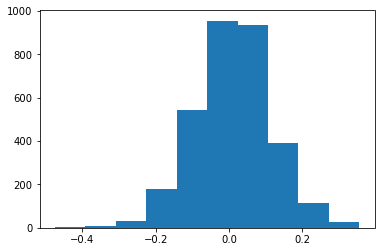

In [3]:
plt.hist(fuji_pv["logdist_corr"])
plt.show()

In [4]:
# hdu = fits.open('./Coma_chris/coma_filtered_inturnaround_desi.fits')
# t = hdu[1].data
# target_id = t['target_id']
# target_id

In [5]:
coma_desi = pd.read_csv("./Coma_chris/coma_all.csv")
coma_desi

,target_id,sdss_id,ra,dec,z,z_err,spectype,survey,program,MASKBITS,...,lum_r,lum_z,in_desi,in_sdss,coma_fof,stillinsample,in_turnaround,delta_R,delta_v,vel
0,39628438616676024,0,194.95247,27.982782,0.017865,0.000071,GALAXY,sv3,bright,0,...,5.415526e+08,6.438666e+08,True,False,True,True,True,0.003814,-1609.34470,5307.9717
1,39628438616675858,1237667444048658525,194.94493,27.973840,0.031485,0.000012,GALAXY,sv3,bright,4096,...,1.492407e+10,2.261809e+10,True,True,True,True,True,0.016424,2375.38800,9290.3710
2,39628438616675869,1237667324334571832,194.94559,27.991917,0.027993,0.000047,GALAXY,sv3,bright,0,...,8.298975e+08,1.117166e+09,True,True,True,True,True,0.022059,1358.70360,8274.5230
3,39628438616675853,0,194.94467,28.000118,0.020665,0.000057,GALAXY,sv3,bright,0,...,5.324131e+08,6.815519e+08,True,False,True,True,True,0.035221,-785.92440,6131.1187
4,39628438616676526,0,194.97472,27.970484,0.022671,0.000039,GALAXY,sv3,bright,0,...,6.044809e+08,8.308895e+08,True,False,True,True,True,0.036667,-197.14447,6719.6430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,39628422497961446,1237667323259781256,192.15393,27.366423,0.026639,0.000005,GALAXY,sv1,bright,0,...,1.049079e+09,1.314343e+09,True,True,True,True,True,4.311669,963.87310,7879.9697
1692,39628417112476991,0,192.20111,27.035795,0.021341,0.000006,GALAXY,sv1,bright,6144,...,1.078935e+10,1.499522e+10,True,False,True,True,True,4.418866,-587.41345,6329.5303
1693,0,1237665441516879941,197.69800,28.995218,0.025010,0.000018,NaN,NaN,NaN,0,...,9.811587e+08,8.940419e+08,False,True,True,True,True,4.419212,487.53052,7403.9380
1694,39628417112478213,1237667322722975777,192.26048,26.893112,0.024620,0.000003,GALAXY,sv1,bright,4096,...,1.147318e+10,1.722939e+10,True,True,True,True,True,4.432741,373.55045,7290.0117


In [6]:
coma_desi.columns.values

array(['target_id', 'sdss_id', 'ra', 'dec', 'z', 'z_err', 'spectype',
       'survey', 'program', 'MASKBITS', 'BRICKNAME', 'BRICKID',
       'BRICK_OBJID', 'PHOTSYS', 'HEALPIX', 'mag_app_g', 'mag_app_r',
       'mag_app_z', 'mag_err_g', 'mag_err_r', 'mag_err_z', 'mag_abs_g',
       'mag_abs_r', 'mag_abs_z', 'lum_g', 'lum_r', 'lum_z', 'in_desi',
       'in_sdss', 'coma_fof', 'stillinsample', 'in_turnaround', 'delta_R',
       'delta_v', 'vel'], dtype=object)

In [7]:
coma_merged = pd.merge(fuji_pv, coma_desi, left_on='targetid_1', right_on='target_id')

In [8]:
coma_merged

,#fibermap_targetid,fibermap_i,ra_1,dec_1,targetid_1,id,healpix,survey_x,program_x,targetid.1,...,lum_r,lum_z,in_desi,in_sdss,coma_fof,stillinsample,in_turnaround,delta_R,delta_v,vel
0,39628417112478213,400,192.260477,26.893112,39628417112478213,1301,28148,sv1,bright,39628417112478213,...,1.147318e+10,1.722939e+10,True,True,True,True,True,4.432741,373.550450,7290.0117
1,39628417133447721,426,193.579225,27.068031,39628417133447721,1304,28149,sv1,bright,39628417133447721,...,9.881991e+10,1.523824e+11,True,False,True,True,True,2.568768,1306.085600,8221.9330
2,39628422523128777,203,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,...,2.967021e+10,4.544369e+10,True,True,True,True,True,1.972953,93.800870,7010.4140
3,39628438608283113,309,194.221420,27.929491,39628438608283113,1267,10400,sv1,bright,39628438608283113,...,7.237596e+09,1.118884e+10,True,True,True,True,True,1.093673,-833.892760,6083.1720
4,39628443939243735,11,193.999798,28.186935,39628443939243735,1267,10400,sv1,bright,39628443939243735,...,4.648998e+09,6.833008e+09,True,True,True,True,True,1.461050,-1374.134500,5543.1180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,39628438620864788,2184,194.986067,27.930032,39628438620864788,3176,10379,sv3,bright,39628438620864788,...,8.085169e+09,1.181922e+10,True,True,True,True,True,0.098539,712.296200,7628.5540
222,39628438616676154,76,194.958779,27.924850,39628438616676154,3176,10379,sv3,bright,39628438616676154,...,3.137109e+09,4.588731e+09,True,True,True,True,True,0.094393,2749.817900,9664.4230
223,39628411743768113,817,194.179984,26.741948,39628411743768113,3421,28127,sv3,bright,39628411743768113,...,3.318638e+09,4.450853e+09,True,True,True,True,True,2.389873,-45.412067,6871.2935
224,39628417133449045,156,193.653392,26.934850,39628417133449045,3418,28149,sv3,bright,39628417133449045,...,1.670891e+10,2.352247e+10,True,True,True,True,True,2.627162,-1029.607900,5887.5180


In [9]:
coma_merged.columns.values

array(['#fibermap_targetid', 'fibermap_i', 'ra_1', 'dec_1', 'targetid_1',
       'id', 'healpix', 'survey_x', 'program_x', 'targetid.1', 'z_1',
       'zerr', 'zwarn', 'spectype_x', 'subtype', 'deltachi2',
       'healpix_id', 'targetid.2', 'target_ra', 'target_dec',
       'obsconditions', 'release', 'brickid_1', 'brick_objid',
       'fiberflux_ivar_g', 'fiberflux_ivar_r', 'fiberflux_ivar_z',
       'morphtype', 'flux_g', 'flux_r', 'flux_z', 'flux_ivar_g',
       'flux_ivar_r', 'flux_ivar_z', 'ebv', 'flux_w1', 'flux_w2',
       'flux_ivar_w1', 'flux_ivar_w2', 'fiberflux_g', 'fiberflux_r',
       'fiberflux_z', 'fibertotflux_g', 'fibertotflux_r',
       'fibertotflux_z', 'sersic_1', 'coadd_numexp', 'coadd_exptime',
       'coadd_numnight', 'coadd_numtile', 'healpix_id.1', 'objid_1',
       'brickid.1', 'brickname_1', 'ra.1', 'dec.1', 'ppxf_sigma',
       'ppxf_sigma_error', 'DER_SNR', 'snr_ppxf', 'OBJID_2', 'BRICKID_2',
       'BRICKNAME_2', 'RA_2', 'DEC_2', 'TYPE', 'SERSIC_2',
      

In [10]:
coma_merged.to_csv('coma_merged_new.csv', index=False, header=True)

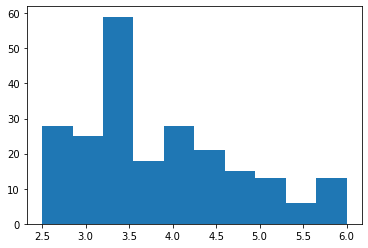

In [11]:
plt.hist(coma_merged.sersic_1)
plt.show()

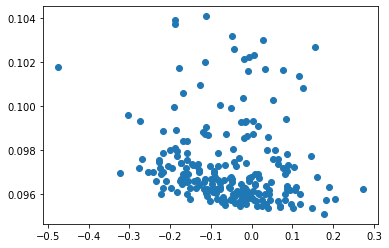

In [12]:
plt.scatter(coma_merged.logdist_corr,coma_merged.logdist_err_corr)
plt.show()

In [13]:
coma_merged

,#fibermap_targetid,fibermap_i,ra_1,dec_1,targetid_1,id,healpix,survey_x,program_x,targetid.1,...,lum_r,lum_z,in_desi,in_sdss,coma_fof,stillinsample,in_turnaround,delta_R,delta_v,vel
0,39628417112478213,400,192.260477,26.893112,39628417112478213,1301,28148,sv1,bright,39628417112478213,...,1.147318e+10,1.722939e+10,True,True,True,True,True,4.432741,373.550450,7290.0117
1,39628417133447721,426,193.579225,27.068031,39628417133447721,1304,28149,sv1,bright,39628417133447721,...,9.881991e+10,1.523824e+11,True,False,True,True,True,2.568768,1306.085600,8221.9330
2,39628422523128777,203,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,...,2.967021e+10,4.544369e+10,True,True,True,True,True,1.972953,93.800870,7010.4140
3,39628438608283113,309,194.221420,27.929491,39628438608283113,1267,10400,sv1,bright,39628438608283113,...,7.237596e+09,1.118884e+10,True,True,True,True,True,1.093673,-833.892760,6083.1720
4,39628443939243735,11,193.999798,28.186935,39628443939243735,1267,10400,sv1,bright,39628443939243735,...,4.648998e+09,6.833008e+09,True,True,True,True,True,1.461050,-1374.134500,5543.1180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,39628438620864788,2184,194.986067,27.930032,39628438620864788,3176,10379,sv3,bright,39628438620864788,...,8.085169e+09,1.181922e+10,True,True,True,True,True,0.098539,712.296200,7628.5540
222,39628438616676154,76,194.958779,27.924850,39628438616676154,3176,10379,sv3,bright,39628438616676154,...,3.137109e+09,4.588731e+09,True,True,True,True,True,0.094393,2749.817900,9664.4230
223,39628411743768113,817,194.179984,26.741948,39628411743768113,3421,28127,sv3,bright,39628411743768113,...,3.318638e+09,4.450853e+09,True,True,True,True,True,2.389873,-45.412067,6871.2935
224,39628417133449045,156,193.653392,26.934850,39628417133449045,3418,28149,sv3,bright,39628417133449045,...,1.670891e+10,2.352247e+10,True,True,True,True,True,2.627162,-1029.607900,5887.5180


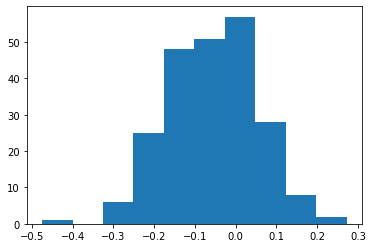

In [14]:
plt.hist(coma_merged.logdist_corr)
plt.show()

In [15]:
cosmo_2 = FlatLambdaCDM(H0=100. * u.km / u.s / u.Mpc, Om0=0.31)

In [16]:
dz_l = cosmo_2.angular_diameter_distance(coma_merged.zcmb).value
dz = cosmo_2.comoving_distance(coma_merged.zcmb)
print (dz)
d_coma = 10**(np.log10(dz) - coma_merged.logdist_corr)
mu = 5.*np.log10(d_coma)+25.
print (np.median(d_coma), "+/-",np.std(d_coma)/np.sqrt(len(d_coma)),"Mpc/h")
print (np.median(10**(np.log10(dz_l) - coma_merged.logdist_corr)))
print (len(d_coma))
print (np.mean(mu))

0       76.198272
1       85.616520
2       73.399488
3       63.824349
4       58.428519
          ...    
221     79.528138
222    100.222618
223     71.911709
224     61.961483
225     59.546808
Name: zcmb, Length: 226, dtype: float64
81.84973776083154 +/- 1.2902336789792015 Mpc/h
79.98749798489533
226
34.53151268341793


In [17]:
print (d_coma, np.log(10) * d_coma * coma_merged.logdist_err_corr, 100.* np.log(10) * d_coma * coma_merged.logdist_err_corr/d_coma)

0       71.996751
1       56.795877
2       85.492292
3       97.326667
4      100.394533
          ...    
221     83.752057
222     92.892043
223     67.619209
224     43.340259
225     91.854929
Length: 226, dtype: float64 0      15.819446
1      12.434112
2      18.800121
3      21.533608
4      22.328979
         ...    
221    19.354895
222    21.751270
223    16.037288
224    10.247016
225    21.940647
Length: 226, dtype: float64 0      21.972444
1      21.892630
2      21.990428
3      22.125085
4      22.241231
         ...    
221    23.109754
222    23.415644
223    23.717059
224    23.643181
225    23.886195
Length: 226, dtype: float64


In [18]:
print (np.log(10))

2.302585092994046


Calculates the weighted mean and the standard error of the weighted mean from a set of values and corresponding uncertainties:

I first define the sample data as two NumPy arrays: d_coma containing the values we want to average, and uncertainties containing the corresponding uncertainties for each value. We then calculate the weights for each value based on the inverse of the squared uncertainties, and use these weights to calculate the weighted mean using the formula:

wmean = Σ (w_i * x_i) / Σ w_i

where x_i is the ith value, w_i is the weight for the ith value, and Σ denotes the sum over all values.

Finally, we calculate the standard error of the weighted mean using the formula:

sem = sqrt( Σ (w_i * (x_i - wmean)^2) / ( Σ w_i ) / (n - 1) )

where n is the sample size. Note that we use n - 1 instead of n in the denominator to account for the fact that we have estimated the population variance from the sample data.

In [19]:
d_coma = d_coma  # values
uncertainties = np.log(10) * d_coma * coma_merged.logdist_err_corr  # uncertainties

weights = 1 / uncertainties**2

wmean = np.sum(weights * d_coma) / np.sum(weights)

sem = np.sqrt(np.sum(weights * (d_coma - wmean)**2) / np.sum(weights) / (len(d_coma) - 1))
estdm = np.std(d_coma)/(np.sqrt(len(d_coma) - 1))
print("Weighted mean: {:.3f}".format(wmean))
print("Standard error of the weighted mean: {:.3f}".format(sem))
print(estdm)
DMPch = np.average(d_coma,weights=weights)
print (DMPch)
print ("Hudsonetal97", cosmo_2.comoving_distance(7200./c))
print (round(np.average(d_coma, weights=1./uncertainties**2),4),"+/-",round(np.std(d_coma)/np.sqrt(len(d_coma)),4))

Weighted mean: 74.814
Standard error of the weighted mean: 1.125
1.2930976862301857
74.81394822124787
Hudsonetal97 71.59607501982944 Mpc
74.8139 +/- 1.2902


In [20]:
def weighted_avg_and_std(values, weights, axis=None):
    average = np.average(values, weights=weights, axis=axis)
    average_err = np.std(values)*np.sqrt(np.sum((weights/np.sum(weights))**2))
    variance = np.average((values-average)**2, weights=weights, axis=axis)
    return (average, average_err, np.sqrt(variance))

results = weighted_avg_and_std(d_coma, weights, axis=None)
print (results)
pv_weights = 1/coma_merged.pverr_corr**2.
results_pv = weighted_avg_and_std(coma_merged.pv_corr,pv_weights, axis=None)
print (results_pv)

(74.81394822124787, 1.4372522643176822, 16.86760553748766)
(-1001.1146364677887, 121.98629606056328, 1720.454613863306)


In [21]:
d = d_coma
sd_d = uncertainties

# calculate uncertainty in mu
mu = 5 * np.log10(d) + 25
sd_mu = np.sqrt((5 / (d * np.log(10)))**2 * sd_d**2)

weights_mu = 1. / sd_mu**2.

results_mu = weighted_avg_and_std(mu, weights_mu, axis=None)
print (results_mu)


mu_t = 5. * np.log10(DMPch) + 25.
print (mu_t)

(34.530133582886066, 0.031994351415375974, 0.4776718329396717)
34.36991287373381


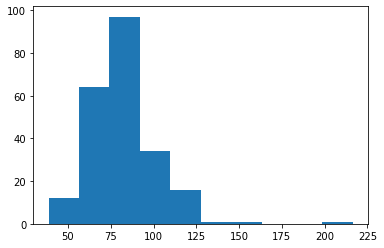

In [22]:
plt.hist(d_coma)
plt.show()

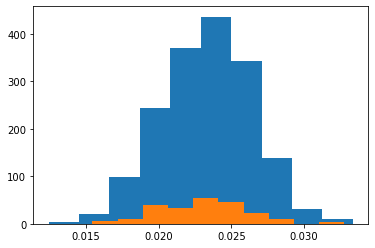

In [23]:
plt.hist(coma_desi.z)
plt.hist(coma_merged.z_1)
plt.show()

In [24]:
print (max(coma_merged.z_1))

0.0327738865775751


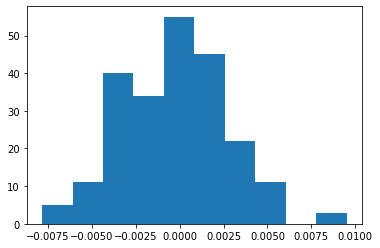

In [25]:
plt.hist(coma_merged.z_1-np.mean(coma_desi.z))
plt.show()

In [26]:
outliers = coma_merged.drop(coma_merged[coma_merged.z_1 < 0.03276].index)

In [27]:
outliers.ppxf_sigma

222    70.706153
Name: ppxf_sigma, dtype: float64

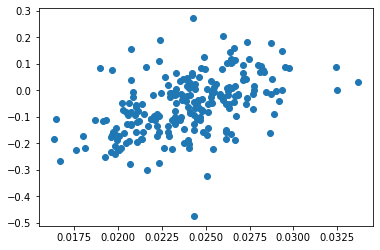

In [28]:
plt.scatter(coma_merged.zcmb,coma_merged.logdist_corr)
plt.show()

In [29]:
fitting_data = pd.read_csv("fp_fitting_data_fuji.csv", delimiter=' ')
fitting_data

,objid,r,s,i,dr,dr_ph,ds,di,Sprob,cz
0,39628417112478216,0.043543,2.142927,2.945744,0.000506,0.016673,0.022928,0.000373,1.0,7380.851869
1,39628417133447720,0.761415,2.437662,2.548015,0.000240,0.014858,0.013168,0.000145,1.0,8337.821434
2,39627769709071904,0.323109,2.173370,2.413567,0.000965,0.013752,0.023817,0.000488,1.0,8962.503400
3,39633076111803112,0.305545,2.308273,2.740888,0.000556,0.032106,0.009379,0.000229,1.0,3750.764392
4,39628422523128776,0.237264,2.432937,2.937962,0.000047,0.017300,0.014172,0.000243,1.0,7103.275514
...,...,...,...,...,...,...,...,...,...,...
3161,39633114296749736,0.112766,1.976588,2.821158,0.003499,0.006970,0.153999,0.001612,1.0,18517.167303
3162,39627658551629976,0.544359,2.113934,2.262257,0.000490,0.010431,0.127291,0.000249,1.0,12604.672182
3163,39627598560494824,0.297660,2.017074,2.543424,0.000718,0.011149,0.163043,0.000265,1.0,11780.556671
3164,39633255741260888,0.577149,1.935949,2.326531,0.001476,0.007338,0.187824,0.001144,1.0,17396.165873


In [30]:
#coma_merged = pd.merge(coma_merged, fitting_data, left_on='targetid_1', right_on='objid')

In [31]:
arc_to_kpc = cosmo.arcsec_per_kpc_proper(coma_merged.zcmb)
R_e = coma_merged.circ_radius/arc_to_kpc.value
gr = coma_merged.mag_g - coma_merged.mag_r_corrected
kcorr_r = calc_kcor('r', coma_merged.z_1, 'g - r', gr)
AbsMag = coma_merged.mag_r_corrected - 5.0*(np.log10(cosmo.comoving_distance(coma_merged.zcmb))) - 25.0
Mu_e = coma_merged.mag_r_corrected + (0.85*coma_merged.zcmb) + 2.5*np.log10(2*np.pi*(coma_merged.circ_radius**2.0)) - 2.5*np.log10((coma_merged.zcmb+1)**4.0) - kcorr_r
logI_e = ( (0.4*4.65) - (0.4*Mu_e) + (2.0*np.log10(206265.0/10.0)))
logR_e = np.log10(R_e)
logS = np.log10(coma_merged.ppxf_sigma)
r_desi = logR_e
s_desi = logS
i_desi = logI_e
# dr = coma_merged.dr
# ds = coma_merged.ds
# di = coma_merged.di

In [32]:
a = 1.15193454; b = -0.80122543
mean_r = 0.22581434; mean_s = 2.1734096; mean_i = 2.68181427
sigma1 = 0.05665097; sigma2 = 0.37865873; sigma3 = 0.21446484
c = mean_r - a*mean_s - b*mean_i
XFP_F_desi = (a*s_desi)+(b*i_desi)+c
#dxfp = np.sqrt((ds*ds)+(di*di))

No handles with labels found to put in legend.


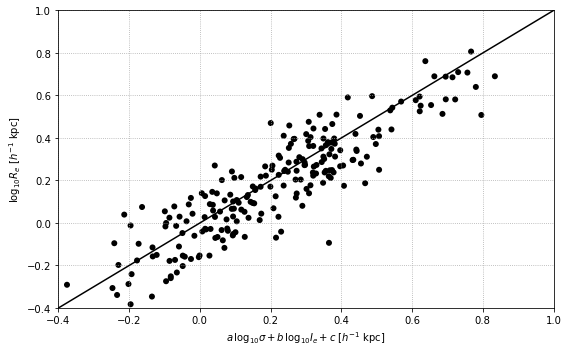

In [33]:
xfit = np.linspace(-0.5, 1.0)
sfit = np.linspace(1.5,3.0)
ifit = np.linspace(0.8,4.5)
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlim(-0.4,1.0)
ax.set_ylim(-0.4,1.0)
ax.scatter(XFP_F_desi, r_desi,color='black',edgecolor='none')#,s=3.5)
#ax.errorbar(XFP_F_desi,r_desi,xerr=dxfp,yerr=dr,fmt=".k",alpha=0.1)
ax.plot(xfit,xfit,c='black')
plt.legend(framealpha=0.0)
ax.grid(b=True, which='both', color='0.65',linestyle=':')
ax.set_xlabel(r'$a \/\log_{10} \sigma + b\/ \log_{10} I_e + c$ [$h^{-1}$ kpc]')
ax.set_ylabel(r'$\log_{10} R_e$ [$h^{-1}$ kpc]')
plt.tight_layout()
plt.savefig('FP_Coma.png', transparent=True)
plt.savefig('FP_Coma.pdf')
plt.show()

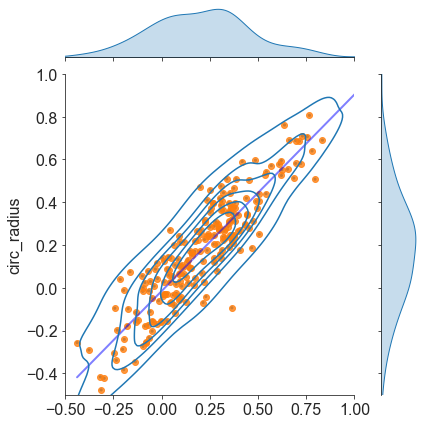

In [34]:
sns.set_style("ticks")
x = XFP_F_desi
y = r_desi
data = np.column_stack((x,y))
df = pd.DataFrame(data, columns=["x", "y"])

g = sns.JointGrid(x="x", y="y", data=df, space=-5.)
g = g.plot_joint(plt.scatter, s=10, edgecolor="None")
g = g.set_axis_labels(xlabel=r'DESI', ylabel=r'SDSS', fontsize = 16)
g = g.plot_joint(sns.kdeplot, zorder=10, levels=7)
g = g.plot_marginals(sns.kdeplot, shade=True)
sns.regplot(x=x, y=y, ci=None, line_kws={"color":"b","alpha":0.5,"lw":2})#g = g.ax_joint.axhline(y=0.0,linestyle='--')
plt.xlim(-0.5,1.0)
plt.ylim(-0.5,1.0)
#g = sns.set(font_scale = 1.5)
#g = g.ax_marg_y.axhline(y=0.0)
plt.tick_params(axis="both", labelsize=16)
plt.tight_layout()
#plt.savefig('pv_method_1_vs_2_double_hist.png')
#plt.savefig('pv_method_1_vs_2_double_hist.pdf')
plt.show()